In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as w
w.filterwarnings('ignore')
%matplotlib inline

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

In [12]:
df = pd.read_csv('/content/drive/MyDrive/College Assignments/ML Assign/Data Sets/MLK/cars_data.csv')

In [13]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [18]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Year               11914 non-null  int64  
 2   Engine Fuel Type   11911 non-null  object 
 3   Engine HP          11845 non-null  float64
 4   Engine Cylinders   11884 non-null  float64
 5   Transmission Type  11914 non-null  object 
 6   Driven_Wheels      11914 non-null  object 
 7   Number of Doors    11908 non-null  float64
 8   Vehicle Size       11914 non-null  object 
 9   Vehicle Style      11914 non-null  object 
 10  highway MPG        11914 non-null  int64  
 11  city mpg           11914 non-null  int64  
 12  Popularity         11914 non-null  int64  
 13  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 1.3+ MB


In [20]:
df.isna().sum()

Make                  0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

# Cleaning the Data

In [14]:
df.drop(['Market Category','Model'],axis=1,inplace=True)

In [22]:
for i in list(df.columns):
  print(i,df[i].unique())
  print('\n')

Make ['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti']


Year [2011 2012 2013 1992 1993 1994 2017 1991 2016 1990 2015 1996 1997 1998
 2014 1999 2002 2003 2004 1995 2007 2008 2009 2001 2010 2000 2005 2006]


Engine Fuel Type ['premium unleaded (required)' 'regular unleaded'
 'premium unleaded (recommended)' 'flex-fuel (unleaded/E85)' 'diesel'
 'electric' 'flex-fuel (premium unleaded recommended/E85)' 'natural gas'
 'flex-fuel (premium unleaded required/E85)'
 'flex-fuel (unleaded/natural gas)' nan]


Engine HP [ 335.  300.  230.  320.  172.  160.  130.  158.  240.  

In [23]:
df['Engine Fuel Type'].replace(np.nan,list(df['Engine Fuel Type'].mode())[0],inplace=True)

In [24]:
df['Transmission Type'].replace({'UNKNOWN':list(df['Transmission Type'].mode())[0],'DIRECT_DRIVE':'AUTOMATIC'},inplace=True)

In [25]:
df['Vehicle Style'].replace({'Convertible':'Coupe','4dr Hatchback':'Hatchback','2dr Hatchback':'Hatchback','4dr SUV':'SUV','Passenger Minivan':'Minivan','Cargo Minivan':'Minivan','Crew Cab Pickup':'Van',
 'Regular Cab Pickup':'Van', 'Extended Cab Pickup':'Van', '2dr SUV':'SUV', 'Cargo Van':'Van','Convertible SUV':'SUV', 'Passenger Van':'Van'},inplace=True)

In [26]:
df['Driven_Wheels'].replace('four wheel drive','all wheel drive',inplace=True)

In [27]:
df['Engine Fuel Type'].replace({'premium unleaded (required)':'unleaded','premium unleaded (recommended)':'unleaded','regular unleaded':'unleaded', 'flex-fuel (unleaded/E85)':'flex-fuel', 'flex-fuel (premium unleaded recommended/E85)':'flex-fuel','flex-fuel (premium unleaded required/E85)':'flex-fuel',
 'flex-fuel (unleaded/natural gas)':'flex-fuel'},inplace=True)

In [28]:
df['Vehicle Size'].replace({'Compact':0,'Midsize':1,'Large':2},inplace=True)

In [30]:
df['Number of Doors'].replace(np.nan,df['Number of Doors'].median(),inplace=True)
df['Number of Doors'] = df['Number of Doors'].astype(int)

In [31]:
df['Engine HP'].replace(np.nan,value= df['Engine HP'].mean(),inplace=True)

In [32]:
df['Engine Cylinders'].replace(np.nan,list(df['Engine Cylinders'].mode())[0],inplace=True)
df['Engine Cylinders'] = df['Engine Cylinders'].astype(int)

<AxesSubplot:>

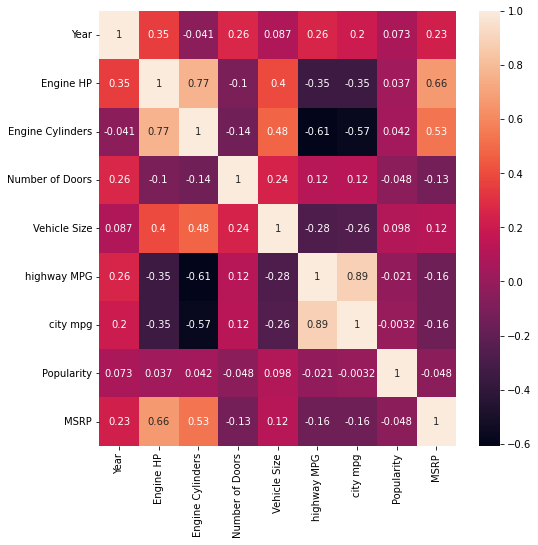

In [34]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

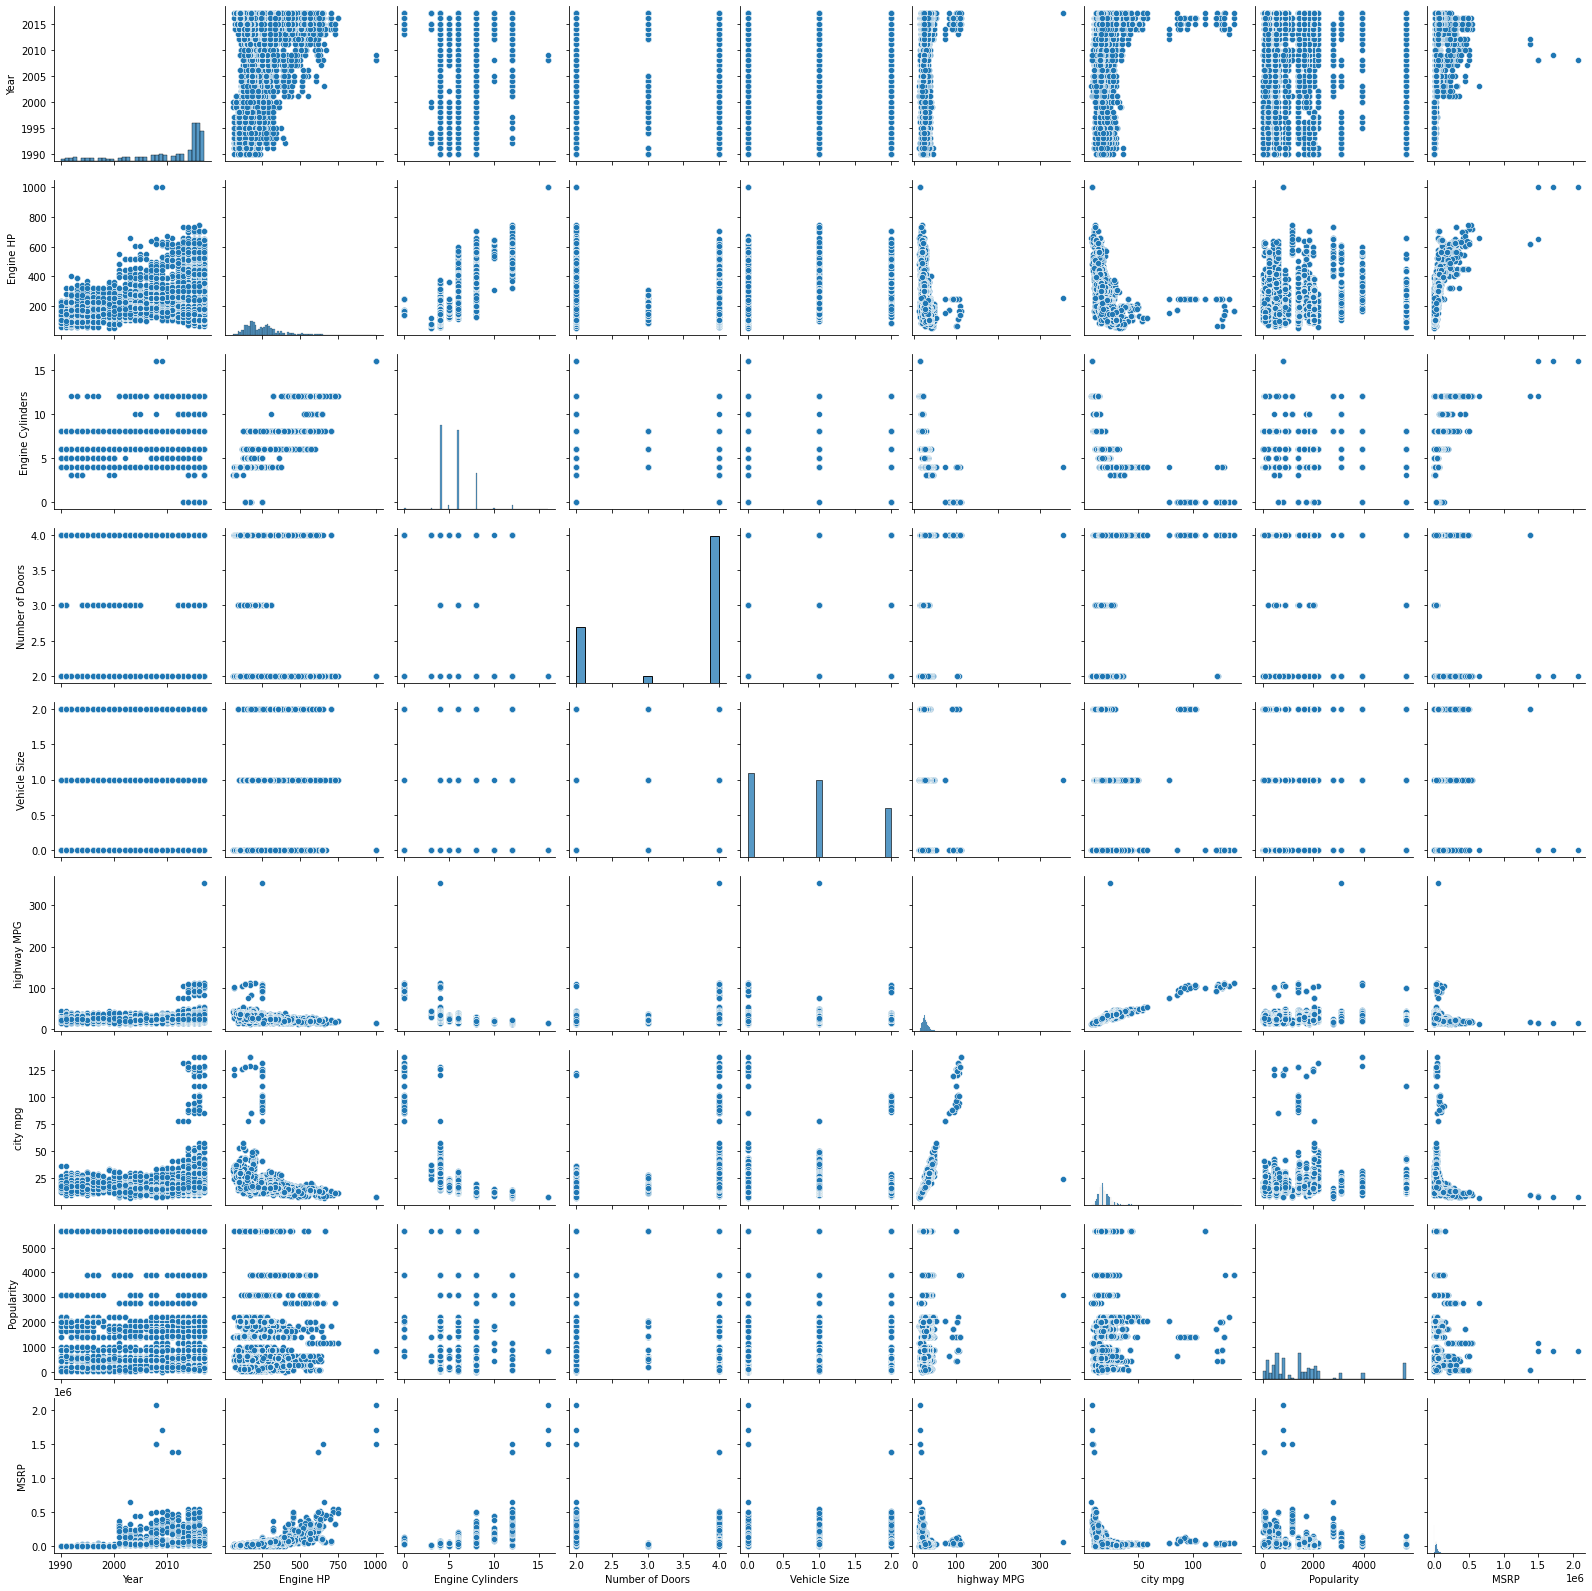

In [35]:
sns.pairplot(df)

In [36]:
for i in list(df.columns):
    if df[i].dtype == 'O':
        print(i,df[i].unique())
        print('\n')

Make ['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti']


Engine Fuel Type ['unleaded' 'flex-fuel' 'diesel' 'electric' 'natural gas']


Transmission Type ['MANUAL' 'AUTOMATIC' 'AUTOMATED_MANUAL']


Driven_Wheels ['rear wheel drive' 'front wheel drive' 'all wheel drive']


Vehicle Style ['Coupe' 'Sedan' 'Wagon' 'Hatchback' 'SUV' 'Minivan' 'Van']




In [37]:
df = pd.get_dummies(data=df,columns=['Engine Fuel Type','Transmission Type','Driven_Wheels','Vehicle Style'],drop_first=True)

In [38]:
df.head()

,Make,Year,Engine HP,Engine Cylinders,Number of Doors,Vehicle Size,highway MPG,city mpg,Popularity,MSRP,Engine Fuel Type_electric,Engine Fuel Type_flex-fuel,Engine Fuel Type_natural gas,Engine Fuel Type_unleaded,Transmission Type_AUTOMATIC,Transmission Type_MANUAL,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive,Vehicle Style_Hatchback,Vehicle Style_Minivan,Vehicle Style_SUV,Vehicle Style_Sedan,Vehicle Style_Van,Vehicle Style_Wagon
0,BMW,2011,335.0,6,2,0,26,19,3916,46135,0,0,0,1,0,1,0,1,0,0,0,0,0,0
1,BMW,2011,300.0,6,2,0,28,19,3916,40650,0,0,0,1,0,1,0,1,0,0,0,0,0,0
2,BMW,2011,300.0,6,2,0,28,20,3916,36350,0,0,0,1,0,1,0,1,0,0,0,0,0,0
3,BMW,2011,230.0,6,2,0,28,18,3916,29450,0,0,0,1,0,1,0,1,0,0,0,0,0,0
4,BMW,2011,230.0,6,2,0,28,18,3916,34500,0,0,0,1,0,1,0,1,0,0,0,0,0,0


In [41]:
cols = ['Make',
 'Year',
 'Engine HP',
 'Engine Cylinders',
 'Number of Doors',
 'Vehicle Size',
 'highway MPG',
 'city mpg',
 'Popularity',
 'Engine Fuel Type_electric',
 'Engine Fuel Type_flex-fuel',
 'Engine Fuel Type_natural gas',
 'Engine Fuel Type_unleaded',
 'Transmission Type_AUTOMATIC',
 'Transmission Type_MANUAL',
 'Driven_Wheels_front wheel drive',
 'Driven_Wheels_rear wheel drive',
 'Vehicle Style_Hatchback',
 'Vehicle Style_Minivan',
 'Vehicle Style_SUV',
 'Vehicle Style_Sedan',
 'Vehicle Style_Van',
 'Vehicle Style_Wagon',
 'MSRP']

In [44]:
df = df.loc[:,cols]

<AxesSubplot:>

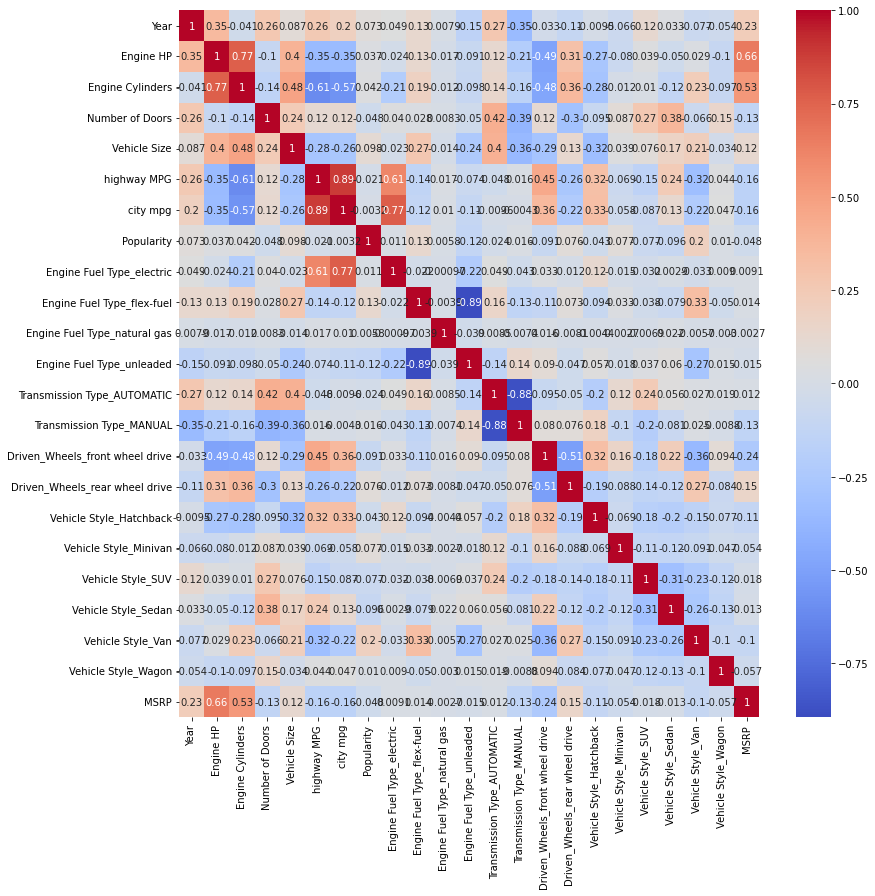

In [55]:
plt.figure(figsize=(13,13))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [88]:
df.corr()['MSRP'] > 0.10

Year                                True
Engine HP                           True
Engine Cylinders                    True
Number of Doors                    False
Vehicle Size                        True
highway MPG                        False
city mpg                           False
Popularity                         False
Engine Fuel Type_electric          False
Engine Fuel Type_flex-fuel         False
Engine Fuel Type_natural gas       False
Engine Fuel Type_unleaded          False
Transmission Type_AUTOMATIC        False
Transmission Type_MANUAL           False
Driven_Wheels_front wheel drive    False
Driven_Wheels_rear wheel drive      True
Vehicle Style_Hatchback            False
Vehicle Style_Minivan              False
Vehicle Style_SUV                  False
Vehicle Style_Sedan                False
Vehicle Style_Van                  False
Vehicle Style_Wagon                False
MSRP                                True
Name: MSRP, dtype: bool

In [93]:
df.corr()['MSRP'] < -0.10

Year                               False
Engine HP                          False
Engine Cylinders                   False
Number of Doors                     True
Vehicle Size                       False
highway MPG                         True
city mpg                            True
Popularity                         False
Engine Fuel Type_electric          False
Engine Fuel Type_flex-fuel         False
Engine Fuel Type_natural gas       False
Engine Fuel Type_unleaded          False
Transmission Type_AUTOMATIC        False
Transmission Type_MANUAL            True
Driven_Wheels_front wheel drive     True
Driven_Wheels_rear wheel drive     False
Vehicle Style_Hatchback             True
Vehicle Style_Minivan              False
Vehicle Style_SUV                  False
Vehicle Style_Sedan                False
Vehicle Style_Van                   True
Vehicle Style_Wagon                False
MSRP                               False
Name: MSRP, dtype: bool

In [92]:
-1>-2

True

In [85]:
df.columns

Index(['Make', 'Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'Vehicle Size', 'highway MPG', 'city mpg', 'Popularity',
       'Engine Fuel Type_electric', 'Engine Fuel Type_flex-fuel',
       'Engine Fuel Type_natural gas', 'Engine Fuel Type_unleaded',
       'Transmission Type_AUTOMATIC', 'Transmission Type_MANUAL',
       'Driven_Wheels_front wheel drive', 'Driven_Wheels_rear wheel drive',
       'Vehicle Style_Hatchback', 'Vehicle Style_Minivan', 'Vehicle Style_SUV',
       'Vehicle Style_Sedan', 'Vehicle Style_Van', 'Vehicle Style_Wagon',
       'MSRP'],
      dtype='object')

In [65]:
from sklearn.model_selection import train_test_split

In [95]:
X = df.loc[:,['Year','Engine HP','Engine Cylinders','Number of Doors','Vehicle Size','highway MPG','city mpg','Transmission Type_MANUAL','Driven_Wheels_front wheel drive','Driven_Wheels_rear wheel drive','Vehicle Style_Van']]
y = df.iloc[:,-1]

In [96]:
X

,Year,Engine HP,Engine Cylinders,Number of Doors,Vehicle Size,highway MPG,city mpg,Transmission Type_MANUAL,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive,Vehicle Style_Van
0,2011,335.0,6,2,0,26,19,1,0,1,0
1,2011,300.0,6,2,0,28,19,1,0,1,0
2,2011,300.0,6,2,0,28,20,1,0,1,0
3,2011,230.0,6,2,0,28,18,1,0,1,0
4,2011,230.0,6,2,0,28,18,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
11909,2012,300.0,6,4,1,23,16,0,0,0,0
11910,2012,300.0,6,4,1,23,16,0,0,0,0
11911,2012,300.0,6,4,1,23,16,0,0,0,0
11912,2013,300.0,6,4,1,23,16,0,0,0,0


In [97]:
y

0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: MSRP, Length: 11914, dtype: int64

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [99]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [100]:
pipeline_lr = Pipeline([('scaler',MinMaxScaler()),('lr',LinearRegression())])

In [101]:
pipeline_lr.fit(X_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('lr', LinearRegression())])

In [102]:
ypred = pipeline_lr.predict(X_test)

Mean absolute error is 18906.836658794633
Mean squared error is 1709694685.3167167
Root Mean squared error is 41348.454448947865
R2 Score is 0.5192269910725604




<AxesSubplot:xlabel='MSRP'>

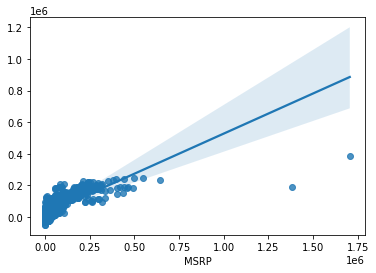

In [103]:
print('Mean absolute error is',mean_absolute_error(y_test,ypred))
print('Mean squared error is',mean_squared_error(y_test,ypred))
print('Root Mean squared error is',np.sqrt(mean_squared_error(y_test,ypred)))
print('R2 Score is',r2_score(y_test,ypred))
print('\n')
sns.regplot(y_test,ypred)